## convecton 2D
$$
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0 \\
\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} + c\frac{u^{n}_{i,j} - u^{n}_{i-1,j}}{\Delta x} + c\frac{u^{n}_{i,j} - u^{n}_{i,j-1}}{\Delta y} = 0 \\
u^{n+1}_{i,j} = u^{n}_{i,j} - c \frac{\Delta t}{\Delta x}(u^{n}_{i,j}-u^{n}_{i-1,j}) - c\frac{\Delta t}{\Delta y}(u^{n}_{i,j} - u^{n}_{i,j-1})
$$
IC 

$u(x,y) =  2$ at $x,y = 2$ and 1 elsewhere

BC

$u = 1$ for $x,y = 0,2$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

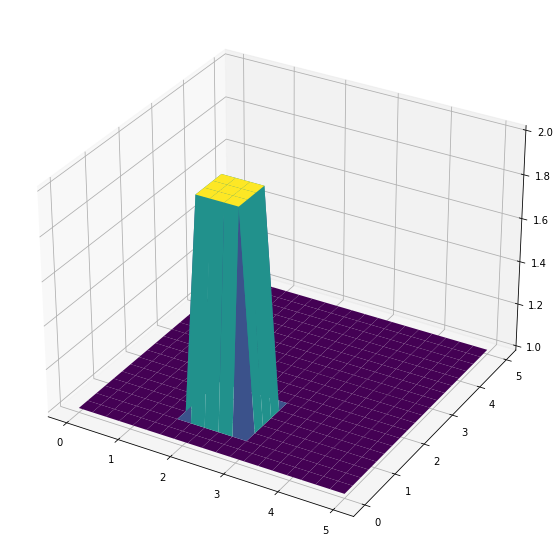

In [3]:
# constants 
c = 1

x_max = 5
y_max = 5
nx = 20
ny = 20
dx = x_max / (nx - 1)
dy = y_max / (ny - 1)
T = 5
nt = 100
dt = T / nt
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)

#init 
u_init = np.zeros((ny, nx))
u_init[:] = 1 
u_init[int(1/dy):int(2/dy), int(2/dx):int(3/dx)] = 2

u0 = u_init.copy()
# print(u0)
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)


# print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 1.0


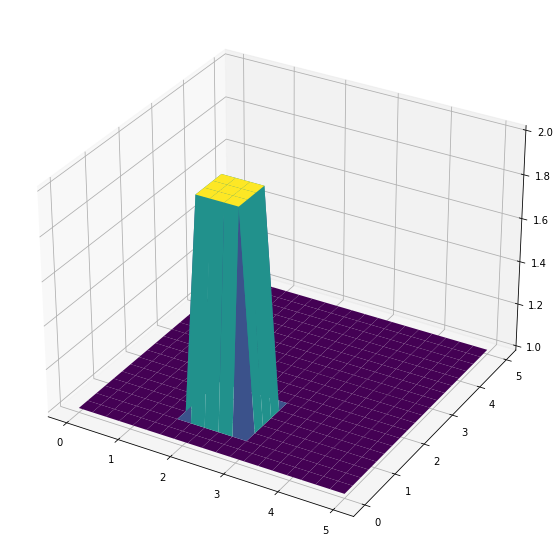

In [4]:
#init 
u0 = u_init.copy()

# finite difference 
for _ in range(0):
    u = u0.copy()
    u = np.array(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u0[i, j] = (u[i,j] - c*(dt/dx)*(u[i,j] - u[i-1,j]) - c*(dt/dy)*(u[i,j] - u[i,j-1]))





fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)   

print(u0[1:,0],u0[1,0])

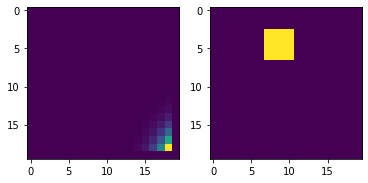

In [5]:
u0 = u_init.copy()

for _ in range(nt):
    u = u0.copy()
    u = np.array(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u0[i, j] = (u[i,j] - c*(dt/dx)*(u[i,j] - u[i-1,j]) - c*(dt/dy)*(u[i,j] - u[i,j-1]))


plt.subplot(1,2,1)
plt.imshow(u0)
plt.subplot(1,2,2)
plt.imshow(u_init)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


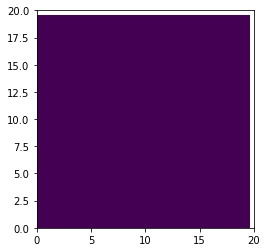

In [6]:
# animate 
# init 
u0 = u_init.copy()

fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(u0)
def animate(frames):
    u = u0.copy()
    u = np.array(u)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u0[i, j] = (u[i,j] - c*(dt/dx)*(u[i,j] - u[i-1,j]) - c*(dt/dy)*(u[i,j] - u[i,j-1]))
    line.set_data(u)
    return line

anim = animation.FuncAnimation(fig, animate, frames=nt, repeat=True)
anim.save('2d convection.gif', fps = 20)
    